In [1]:
import qiskit
from qiskit import QuantumCircuit
from qiskit import Aer,execute, QuantumRegister,ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit import transpile
from qiskit.tools.monitor import job_monitor
from qiskit_ibm_provider import IBMProvider

## Load Account, Choose your provider, and Select a device

Procedures of loading your account locally:
https://github.com/Qiskit/qiskit-ibmq-provider#configure-your-ibm-quantum-credentials

Check accessible devices

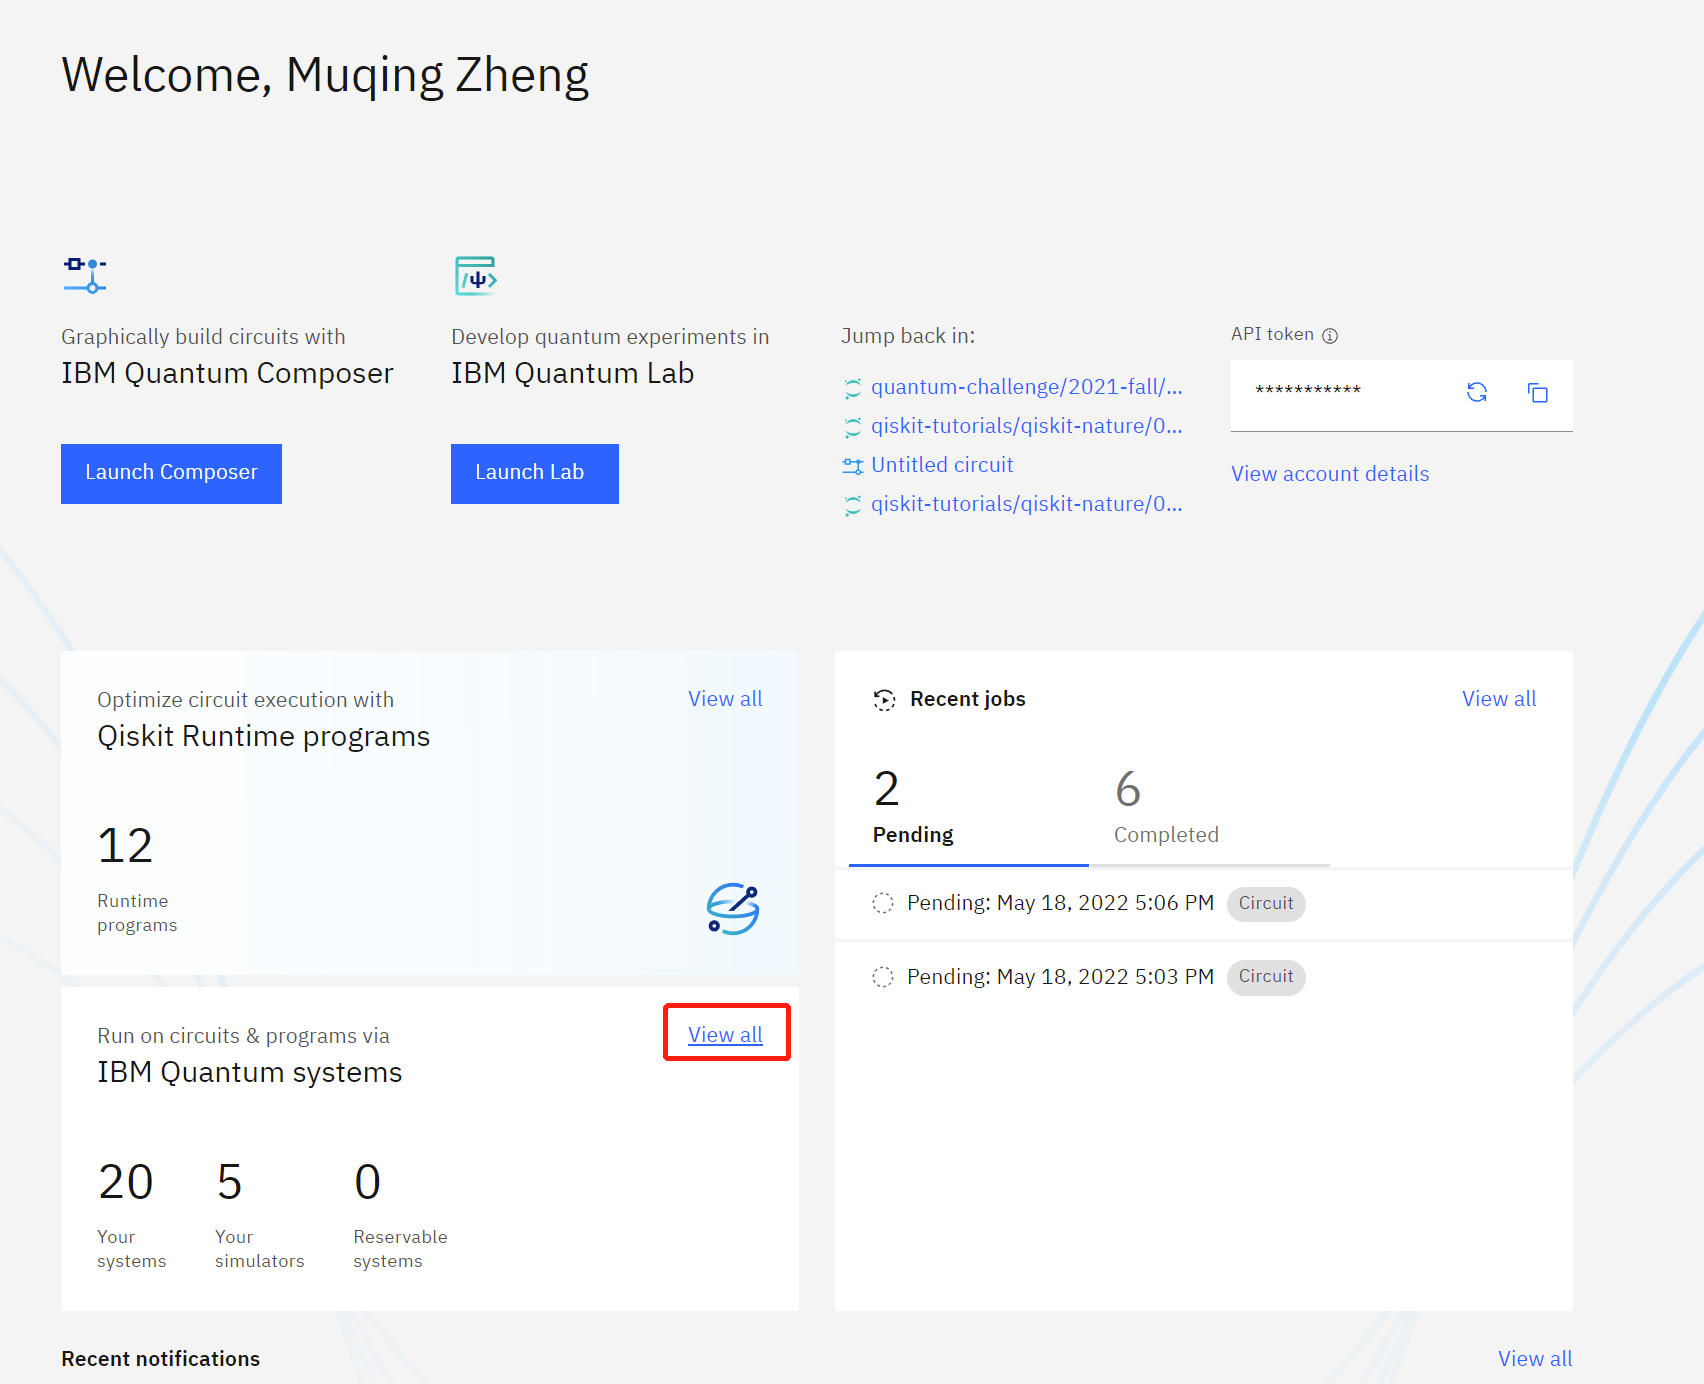

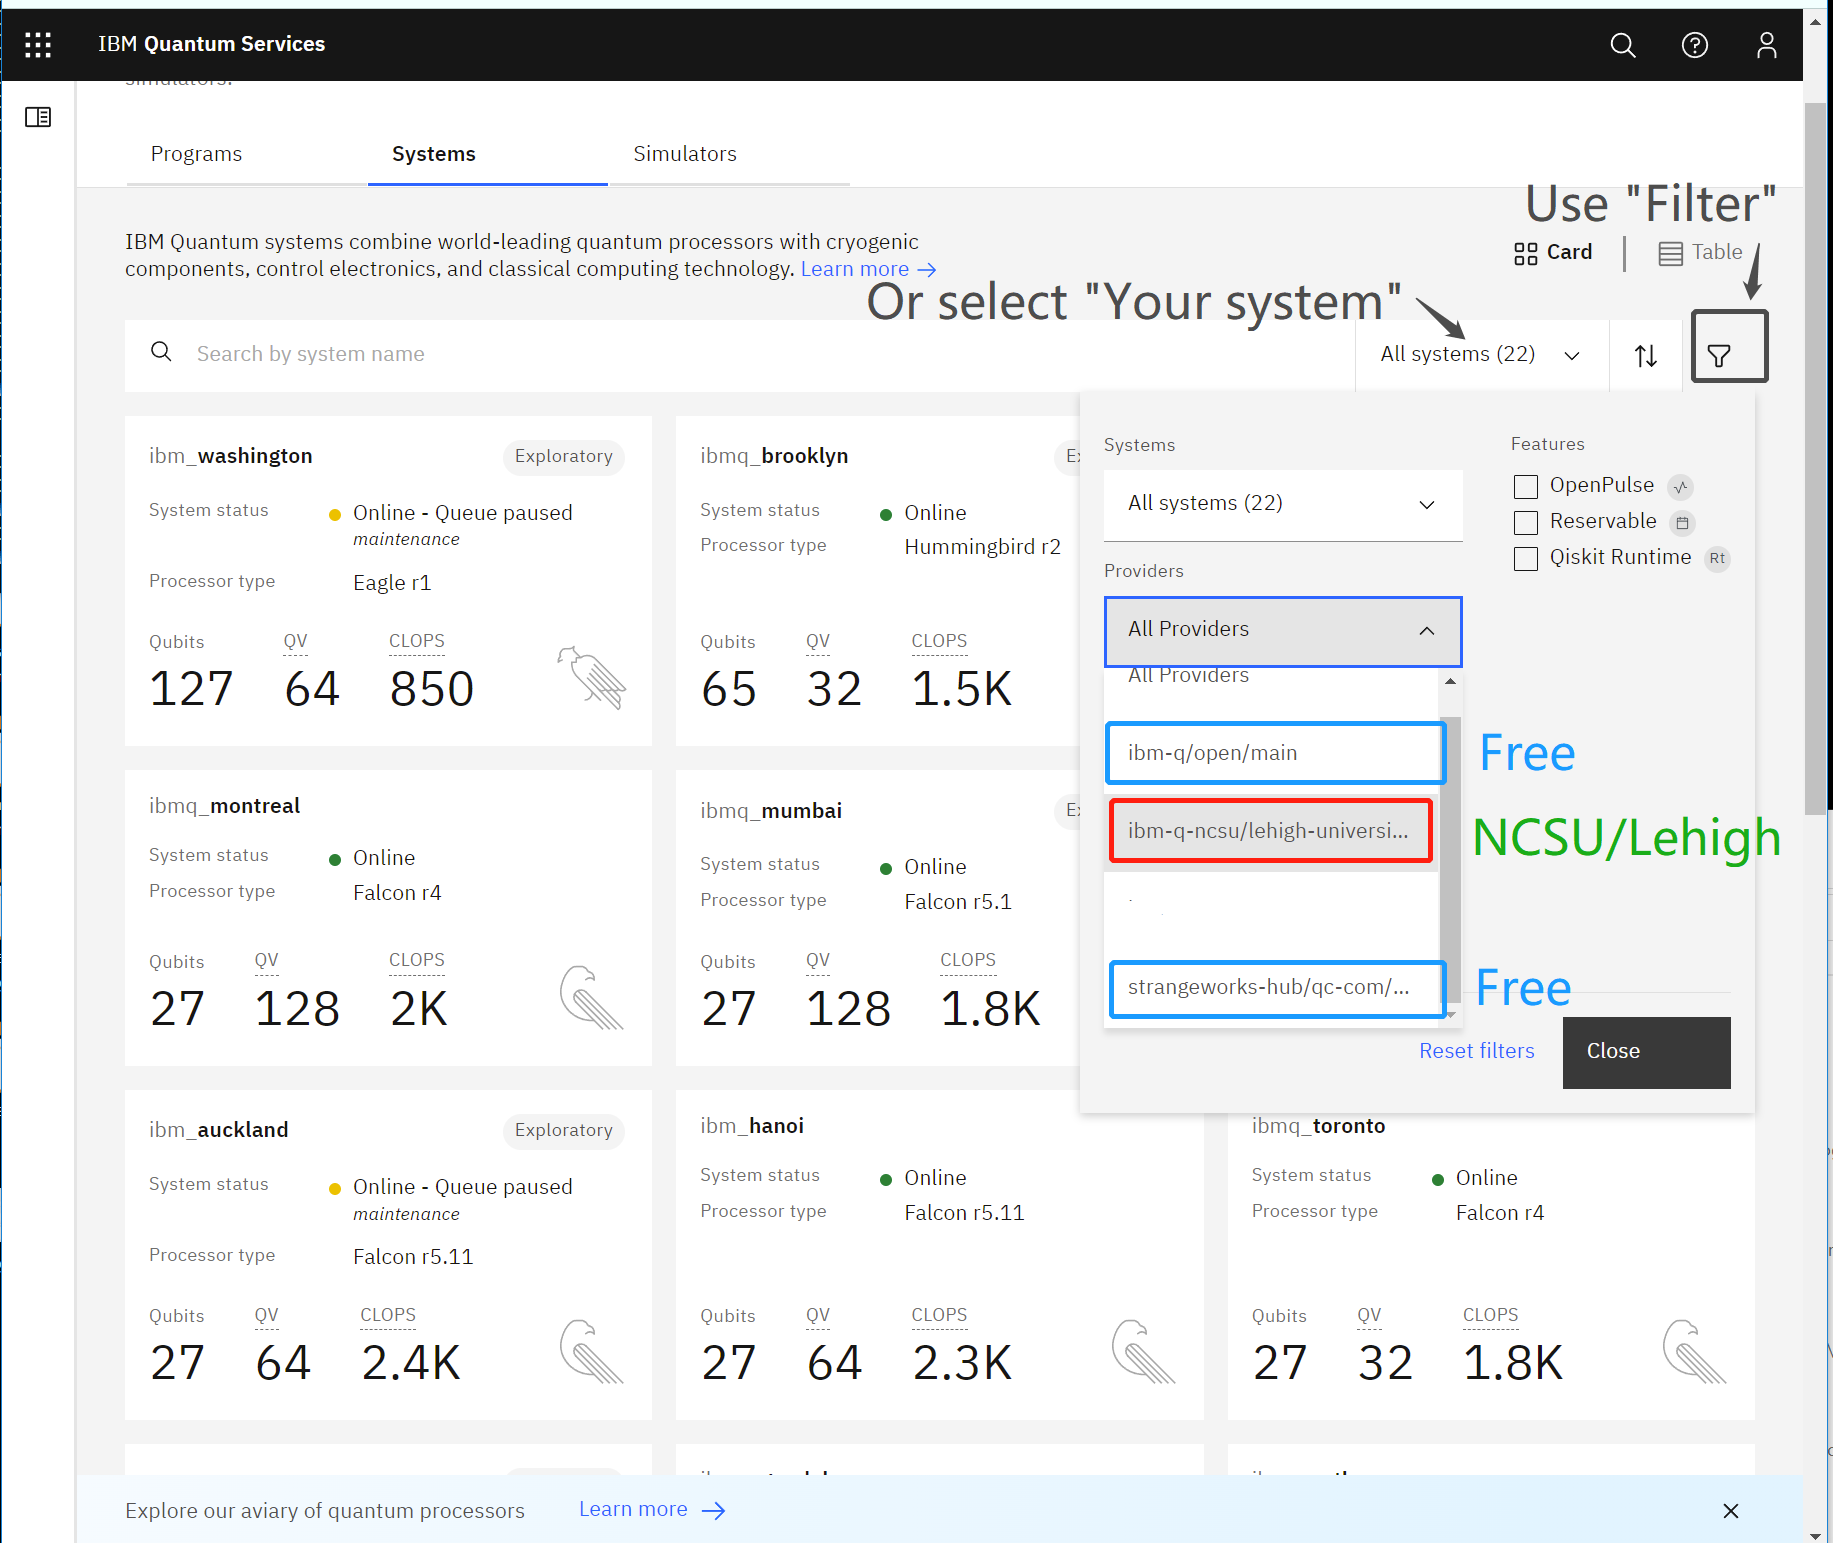

In [3]:
# Load IBMQ Account and choose a real backend
# Save account credentials.
# IBMProvider.save_account(token=MY_API_TOKEN)

# Load previously saved account credentials.
provider = IBMProvider(instance='ibm-q-ncsu/lehigh-universit/qc-error-model')
name = 'ibmq_kolkata'
backend = provider.get_backend(name)

## Create a quantum circuit

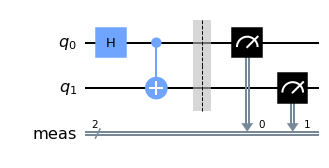

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw("mpl")

## Submit the job to a machine

Then the job will be sent to the selected backend. The combinatin of job_id + backend_name will allow you obtain the result anytime.

If you want to wait or keep the script running, you can use `job_monitor()` to check the which stage you are in (order in the queue and completion of the job). Note that the queue is a priority queue, you can check https://quantum-computing.ibm.com/lab/docs/iql/manage/systems/queue/ for more information.

About `execute()`
1. `execute()` allow use submit multiple circuit at the same time
2. Maximum number of shots differs when you have different provider (e.g., for `ibmq_jakarta`, the free provider has maximum shots 32,000 but NCSU provider has 100,000)
3. Setting `memory=True` allow you to recover the bitstring outcome from every measurement.
4. `execute()` will classically optimize your circuit by reducing the circuit depth and number of CX gates. Higher `optimization_level`, longer optimization time. Setting it at `0` means no optimization, at `3` means highest level of circuit optimization. Usually `1` is enough.

If you do not want to wait or want to close the script, just remember the job ID.

In [8]:
job = execute(qc, backend=backend, shots=10000, memory=False, optimization_level=0)
jobid = job.job_id()
print(job.job_id())
job_monitor(job)

cmxevpyapzf0008zwdy0
Job Status: job has successfully run


The job is automatically retrieved if you keep waiting

After the job is finished, you can retrieve the job using the job ID anytime anywhere from the same backend and the same account.

In [6]:
jobid = 'cmxevpyapzf0008zwdy0'
job = provider.backend.retrieve_job(jobid)
res = job.result()
print(res.get_counts())

{'00': 4998, '01': 97, '10': 110, '11': 4795}


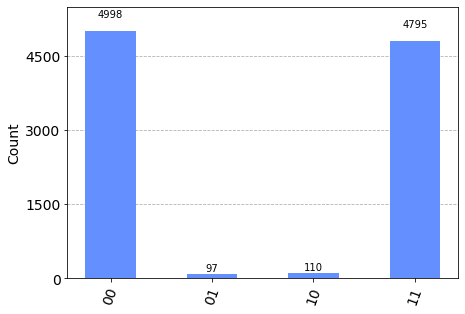

In [7]:
plot_histogram(res.get_counts())